In [16]:
import numpy as np
import matplotlib.pyplot as plt
import re

from skimage.data import camera     # estas librerías solo se usan para
from PIL import Image               # llamar al ejemplo de cameraman.png

In [17]:
def xor(a, b):
    m = len(a)
    n = len(b)
    maxx = max(m,n)
    if (m < n):
        a = a + (n-m)*'0'
    if (n < m):
        b = b + (m-n)*'0'
        
    c = ''
    for i in range(0, maxx):
        c = c + str(int(a[i]) ^ int(b[i]))
    return c

In [18]:
def img2bits(I):
    ''' Convierte una imagen en escala de grises a cadena de bits.
        Input:  I = imagen, como numpy array de shape (m,n).
        Output: s = string de bits, donde se concatenan cada pixel de I.
    '''
    m, n = I.shape
    s = ''
    for i in range(0, m):
        for j in range(0, n):
            s = s + '{0:08b}'.format(I[i,j])
    return s

In [19]:
def bits2img(x, shape):
    ''' Convierte una cadena de bits a una imagen en escala de grises.
        Input:  s = string de bits, donde se concatenan cada pixel de I.
                shape = dimensiones (m,n) de la imagen de salida I.
        Output: I = imagen, como numpy array de shape (m,n).
    '''

    m, n = shape
    I = np.zeros(m*n).astype(np.uint8)
    bts = re.findall('........', x)
    for i in range(0, len(bts)):
        I[i] = int(bts[i], 2)
    I = I.reshape(m,n)
    return I

## Ejemplo

In [20]:
# aquí pueden leer cualquier imagen de su preferencia.

# OJO! tienen que convertirla a escala de grises, y formato 8bits
# por ejemplo, como I = I.astype(np.uint8)

I = camera()
J = Image.fromarray(I)
J = J.resize((J.size[0]//2, J.size[1]//2), Image.LANCZOS)
I = np.array(J)

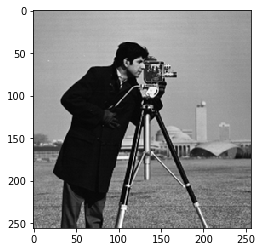

In [21]:
plt.figure()
plt.imshow(I, cmap='gray')
plt.show()

In [22]:
s1 = img2bits(I)

In [23]:
print(s1[:100])

1001110110011111100111011001110010011101100111011001111110011110100111001001110110011110100111111010


In [24]:
len(s1)

524288

In [28]:
# cadena aleatoria
s = np.random.choice(2, size=len(s1))
s2 = ''
for i in range(0, len(s)):
    s2 = s2 + str(s[i])

In [30]:
print(s2[:100])

0111111110100000111110000111111011111000010110000110111011100010011101111001001111101000001111011111


In [31]:
s3 = xor(s1,s2)

In [32]:
# convertir s2 y s3 de regreso a imágenes, del mismo tamaño que I
I2 = bits2img(s2, I.shape)
I3 = bits2img(s3, I.shape)
I1 = bits2img(xor(s2,s3), I.shape)

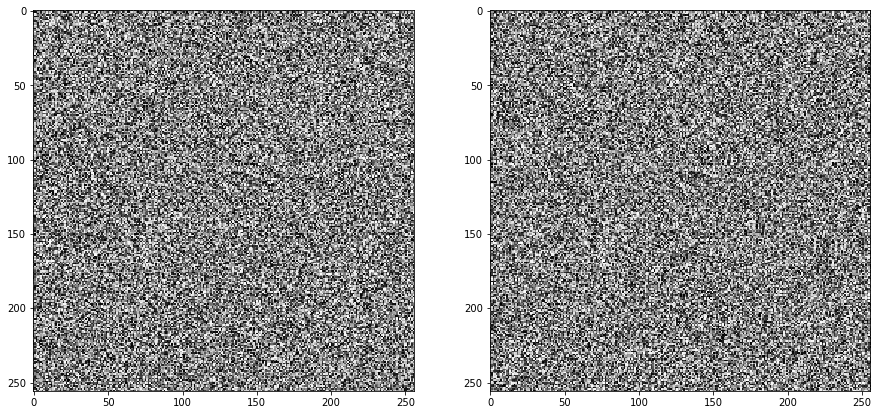

In [33]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow(I2, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(I3, cmap='gray')
plt.show()

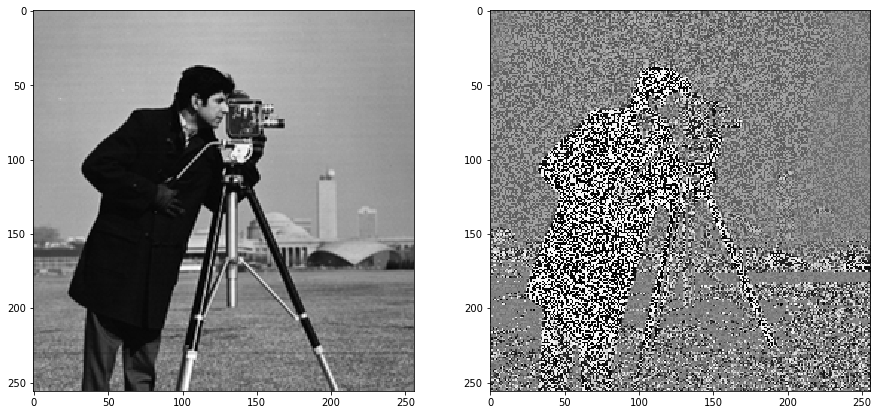

In [34]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow(I1, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(I3-I2, cmap='gray')
plt.show()